In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
!pip install chart_studio plotly
# Import the library


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.8 MB/s eta 0:00:00


In [3]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot
#for offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [4]:
data = pd.read_csv("INR=X.csv")
data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,71.320000,71.635002,71.320000,71.324997,71.324997,0
1,2020-01-28,71.654999,71.654999,71.178001,71.440002,71.440002,0
2,2020-01-29,71.230103,71.425003,71.168503,71.230400,71.230400,0
3,2020-01-30,71.300003,71.711998,71.300003,71.300003,71.300003,0
4,2020-01-31,71.639999,71.639999,71.277496,71.639999,71.639999,0
5,2020-02-03,71.544998,71.699997,71.265503,71.496498,71.496498,0
6,2020-02-04,71.314102,71.514999,71.084999,71.314102,71.314102,0
7,2020-02-05,71.100403,71.279999,71.099899,71.099998,71.099998,0
8,2020-02-06,71.181000,71.397499,71.121002,71.180000,71.180000,0
9,2020-02-07,71.470001,71.570999,71.177498,71.470001,71.470001,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       262 non-null    object 
 1   Open       262 non-null    float64
 2   High       262 non-null    float64
 3   Low        262 non-null    float64
 4   Close      262 non-null    float64
 5   Adj Close  262 non-null    float64
 6   Volume     262 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.5+ KB


In [5]:
data['Date']=pd.to_datetime(data['Date'])  #convering date to datetime format

In [6]:
print (f'Dataframe contains stock prices between {data.Date.min()} {data.Date.max()}')


Dataframe contains stock prices between 2020-01-27 00:00:00 2021-01-26 00:00:00


In [7]:
# Assuming 'data' is your DataFrame containing the 'Date' column
# data['Date'] = pd.to_datetime(data['Date'])

# print(data.dtypes)  # Check data types

# print(data['Date'].isnull().sum())  # Check for missing values

days_difference = (data['Date'].max() - data['Date'].min()).days

print(f'Total days = {days_difference} days')


Total days = 365 days


In [8]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,262.000000,262.000000,262.000000,262.000000,262.000000,262.0
mean,74.373533,74.631087,74.011048,74.358489,74.358489,0.0
std,1.417620,1.494521,1.311330,1.426245,1.426245,0.0
min,71.100403,71.279999,71.064003,71.099998,71.099998,0.0
25%,73.546175,73.706577,73.202003,73.531049,73.531049,0.0
50%,74.332001,74.531300,73.881748,74.275799,74.275799,0.0
75%,75.484551,75.737499,75.067053,75.489424,75.489424,0.0
max,77.684998,77.754997,76.496300,77.570000,77.570000,0.0


<Axes: title={'center': 'Histogram'}, ylabel='Frequency'>

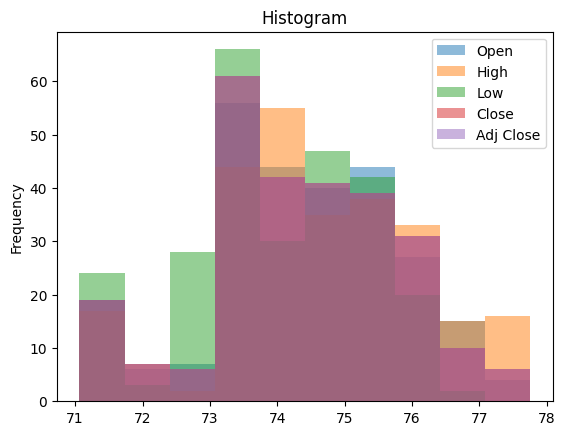

In [9]:
data[['Open', 'High', 'Low', 'Close', 'Adj Close']].plot(kind="hist", title="Histogram", alpha=0.5)

<Axes: title={'center': 'Density Plot'}, ylabel='Density'>

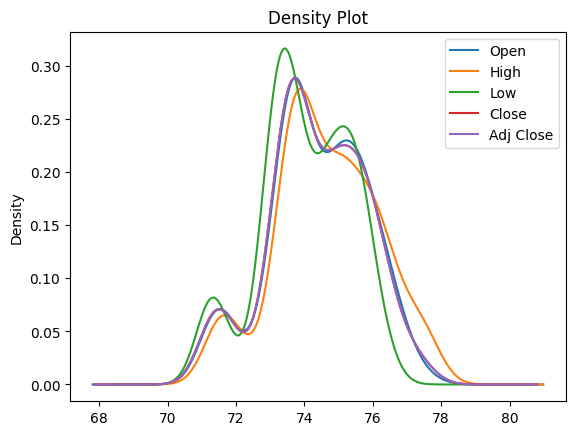

In [10]:
data[['Open', 'High', 'Low', 'Close', 'Adj Close']].plot(kind="density", title="Density Plot")

<Axes: >

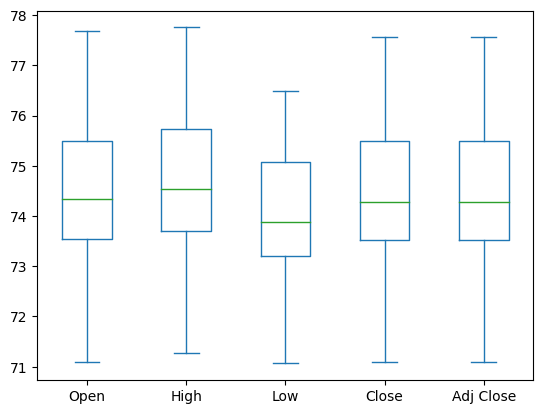

In [ ]:
data[['Open', 'High', 'Low', 'Close', 'Adj Close']].plot(kind="box")

In [13]:
#Setting the layout for our plot
import plotly.graph_objects as go

layout = go.Layout(
      title='Stock Prices of Tesla',
      xaxis =dict(
                   title='Date',
                   titlefont= dict(
                          family='Courier New, monospace',
                          size=18,
                          color='#7f7f7f' )
),
      yaxis =dict(
                title='Price',
                titlefont=dict(
                        family='Courier New, monospace',
                        size=18,
                        color='#7f7f7f'

                )
      )
)

stock_data = [{'x':data['Date'], 'y':data['Close']}]

fig = go.Figure(data=stock_data, layout=layout)


In [15]:
iplot(fig)

In [16]:
#Building the regression model

from sklearn.model_selection import train_test_split
#For preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#For model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [17]:
#Split the data into train and test sets
X= np.array(data.index).reshape(-1,1)
Y = data['Close']
X_train, X_test, Y_train, Y_test =train_test_split(X, Y, test_size=0.3, random_state=101)

In [18]:
#Feature scaling
scaler= StandardScaler().fit(X_train)


In [19]:
from sklearn.linear_model import LinearRegression
#Creating a linear model
lm= LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [20]:
#Plot actual and predicted values for train dataset
tracee =go.Scatter(
         x = X_train.T[0],
         y = Y_train,
         mode = 'markers',
         name= 'Actual' )
trace1=go. Scatter(
          x = X_train.T[0],
          y = lm.predict(X_train).T,
          mode = 'lines',
          name ="Predicted")
stock_data = [tracee, trace1]
layout.xaxis.title.text = 'Day'
plot2=go.Figure(data=stock_data, layout=layout)

In [21]:
iplot(plot2)

In [32]:
from sklearn.metrics import r2_score, mean_squared_error

# Calculate R-squared scores
r2_train = r2_score(Y_train, lm.predict(X_train))
r2_test = r2_score(Y_test, lm.predict(X_test))

# Calculate MSE scores
mse_train = mean_squared_error(Y_train, lm.predict(X_train))
mse_test = mean_squared_error(Y_test, lm.predict(X_test))

# Construct the scores output using f-string
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'R2 Score'.ljust(10)}{r2_train:.6f}\t{r2_test:.6f}
{'MSE'.ljust(10)}{mse_train:.6f}\t{mse_test:.6f}
'''
print(scores)




Metric           Train                Test        
R2 Score  0.013806	0.012899
MSE       2.120778	1.692810

